In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import os
from statistics import mean
import notebook_functions

In [2]:
sphere_path = "./data/oranges/obj0001"
oblate_path = "./data/mandarins/obj0001"
prolate_path = "./data/tomato_large/bb_obj0000/"
path = sphere_path
image = None
axe_b_all_views = []
axe_a_all_views = []
image_files = sorted([file for file in os.listdir(path)])

In [3]:
def calculate_ellipse_from_mask(binary_mask):
    mask = binary_mask.astype(np.int32)
    y_indices, x_indices = np.indices(mask.shape)
    positive_pixels = mask == 255
    result_x = x_indices[positive_pixels]
    result_y = y_indices[positive_pixels]
    n = len(result_x)

    sx = np.sum(result_x)
    cx = sx / len(result_x)
    sxx = np.sum(np.square(result_x))

    sy = np.sum(result_y)
    cy = sy / len(result_y)
    syy = np.sum(np.square(result_y))

    mult_list = [x * y for x, y in zip(result_x, result_y)]
    sxy = np.sum(mult_list)

    sigma_x2 = (sxx / n) - cx ** 2
    sigma_y2 = (syy / n) - cy ** 2
    sigma_xy = (sxy / n) - (cx * cy)

    cov_matrix = [[sigma_x2, sigma_xy], [sigma_xy, sigma_y2]]
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    direction_a = eigenvectors[0] / np.linalg.norm(eigenvectors[0])
    direction_b = eigenvectors[1] / np.linalg.norm(eigenvectors[1])

    a = int(2 * (math.sqrt(abs(eigenvalues[0]))))  # semi major axis of projected ellipse
    b = int(2 * (math.sqrt(abs(eigenvalues[1]))))  # semi minor axis of projected ellipse

    return [a, b], [int(cx), int(cy)], [direction_a, direction_b] ,[*eigenvectors],


In [4]:
for image_name in image_files:
    file_path = os.path.join(path, image_name)
    img = cv2.imread(file_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY)
    ellipse = calculate_ellipse_from_mask(mask)
    axes_length, _, _, _ = ellipse
    major_axis_length, minor_axis_length = axes_length
    axe_b_all_views.append(minor_axis_length)
    axe_a_all_views.append(major_axis_length)
    image = img


In [5]:
# OBLATE - SPHEROID CALCULATION
a_obl = mean(axe_a_all_views)
b_obl = min(axe_b_all_views)
oblate_spheroid = [a_obl, b_obl]

In [6]:
# PROLATE - SPHEROID CALCULATION
a_prol = max(axe_a_all_views)
b_prol = mean(axe_b_all_views)
prolate_spheroid = [a_prol, b_prol]

In [7]:
# SPHERE - SPHEROID CALCULATION
axes_sum = [(x + y) / 2 for x, y in zip(axe_a_all_views, axe_b_all_views)]
sphere_axe = mean(axes_sum)
sphere_spheroid = [sphere_axe, sphere_axe]

## SPHERE

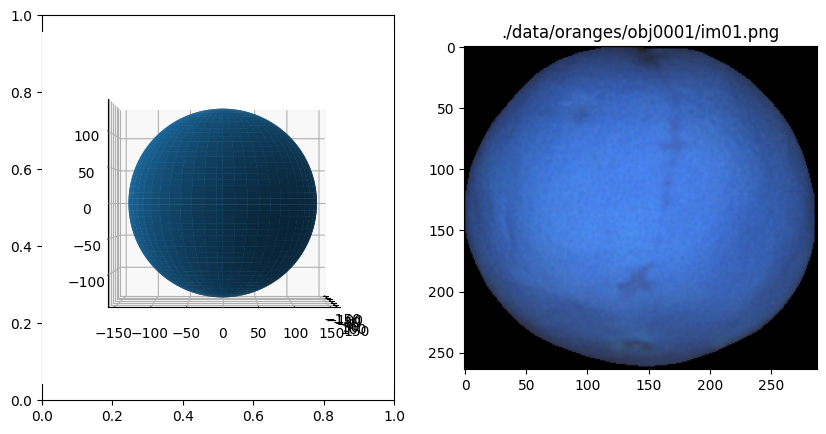

In [8]:
a = sphere_spheroid[0]  # Semi-major axis along x-axis
b = sphere_spheroid[0]  # Semi-major axis along y-axis
c = sphere_spheroid[0]  # Semi-major axis along z-axis

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = a * np.outer(np.cos(u), np.sin(v))
y = b * np.outer(np.sin(u), np.sin(v))
z = c * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
axs[0] = fig.add_subplot(121, projection='3d')
axs[0].plot_surface(x, y, z)
axs[0].view_init(elev=0, azim=0)
axs[0].set_aspect('equal')

axs[1].imshow(image)
axs[1].set_title(sphere_path + "/im01.png")

plt.show()

## OBLATE

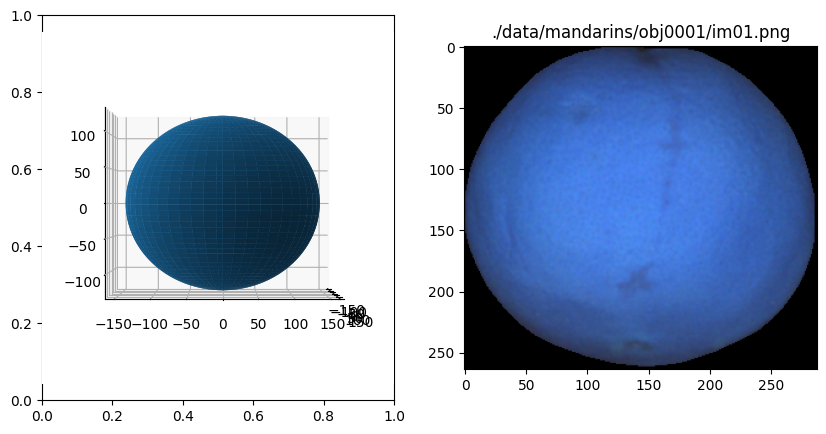

In [9]:
a = oblate_spheroid[0]  # Semi-major axis along x-axis
b = oblate_spheroid[0]  # Semi-major axis along y-axis
c = oblate_spheroid[1]  # Semi-major axis along z-axis

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = a * np.outer(np.cos(u), np.sin(v))
y = b * np.outer(np.sin(u), np.sin(v))
z = c * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
axs[0] = fig.add_subplot(121, projection='3d')
axs[0].plot_surface(x, y, z)
axs[0].view_init(elev=0, azim=0)
axs[0].set_aspect('equal')

axs[1].imshow(image)
axs[1].set_title(oblate_path + "/im01.png")

plt.show()

## PROLATE

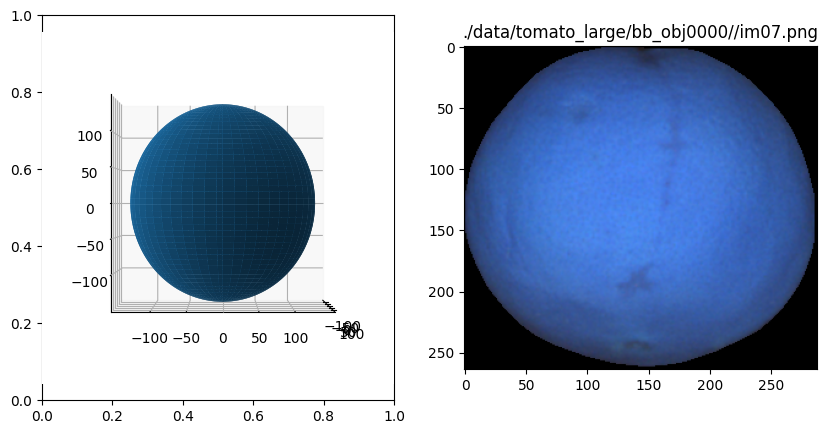

In [10]:
a = prolate_spheroid[1]  # Semi-major axis along x-axis
b = prolate_spheroid[1]  # Semi-major axis along y-axis
c = prolate_spheroid[0]  # Semi-major axis along z-axis

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = a * np.outer(np.cos(u), np.sin(v))
y = b * np.outer(np.sin(u), np.sin(v))
z = c * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
axs[0] = fig.add_subplot(121, projection='3d')
axs[0].plot_surface(x, y, z)
axs[0].view_init(elev=0, azim=0)
axs[0].set_aspect('equal')


axs[1].imshow(image)
axs[1].set_title(prolate_path + "/im07.png")

plt.show()